In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/Users/aasthaprajapati/Desktop/MOCK_DATA (1).csv')

In [4]:
df.head()

,weight,obese?
0,90.40,Not Obese
1,81.30,Not Obese
2,98.71,Not Obese
3,139.03,Obese
4,99.10,Not Obese


In [5]:
df['obese?'] = df['obese?'].astype('category')

In [6]:
df['obese?'].dtype

CategoricalDtype(categories=['Not Obese', 'Obese'], ordered=False)

In [7]:
df['obesity measure'] = df['obese?'].cat.codes

In [8]:
df = df.drop(columns='obese?')

In [9]:
df.head()

,weight,obesity measure
0,90.40,0
1,81.30,0
2,98.71,0
3,139.03,1
4,99.10,0


In [10]:
df['weight'] = (df['weight'] - df['weight'].min())/(df['weight'].max()-df['weight'].min())

In [11]:
(df[df['weight']>0.54] == 0).value_counts()

weight  obesity measure
False   False              466
        True                 4
dtype: int64

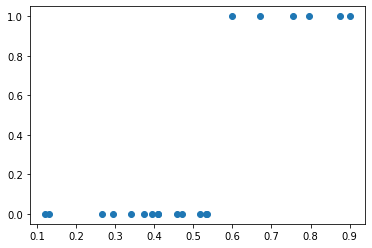

In [12]:
plt.scatter(df['weight'].iloc[0:20], df['obesity measure'].iloc[0:20])

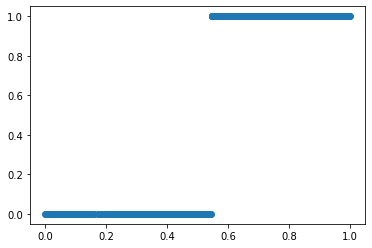

In [13]:
plt.scatter(df['weight'], df['obesity measure'])

In [14]:
df.head()

,weight,obesity measure
0,0.457237,0
1,0.374351,0
2,0.532926,0
3,0.900173,1
4,0.536479,0


In [15]:
split_percentage = 0.75
msk = np.random.rand(len(df)) < 0.75
train = df[msk]
test = df[~msk]

In [16]:
x = train.iloc[0:,0:-1].values
y = train.iloc[0:,-1:].values

x_test = test.iloc[0:,0:-1].values
y_test = test.iloc[0:,-1:].values

In [17]:
y.shape

(744, 1)

In [18]:
def sigmoid_function(x):
    sgmd = (1/(1+np.exp(-x)))
    
    return sgmd

In [19]:
def gradient_descent(x, y, w, b, learning_rate = 0.01, epoch = 5000):
    cost = []
    
    n = len(y)
    for i in range(epoch):
        
        z = x.dot(w) + b
        y_hat = sigmoid_function(z)
        r = y - y_hat
        
        cost.append((np.sum(y*np.log(y_hat) + (1-y)*np.log(1-y_hat)))/(-n))
        
        
        w = w - (-1/n)*(x.T.dot(r))*learning_rate
        b = b - (-1/n)*(np.sum(r))*learning_rate
        
    return w, b, cost
        
        

In [20]:
w = np.random.rand(x.shape[-1], 1)
b = np.random.rand()

In [21]:
w,b,cost = gradient_descent(x,y,w,b,0.01,40000)

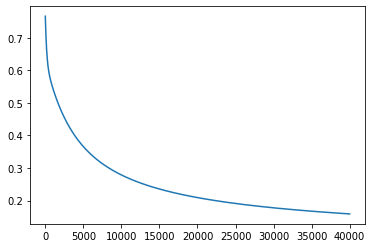

In [22]:
plt.plot(cost)

In [23]:
y_ = x.dot(w) + b

In [24]:
y_[0:10]

array([[-0.88204493],
       [-1.75548842],
       [-0.08442784],
       [-0.04699455],
       [ 3.53604344],
       [-4.419971  ],
       [-0.26007637],
       [-1.55296471],
       [-0.74478952],
       [-1.37923584]])

In [25]:
y_hat = x.dot(w) + b

In [26]:
y_hat = sigmoid_function(y_hat)
y_hat = y_hat > 0.5
y_hat = np.array(y_hat, dtype = int)

In [27]:
def accuracy(x,y,w,b):
    z = x.dot(w) + b
    y_hat = sigmoid_function(z)
    
    y_hat = y_hat > 0.5
    
    y_hat = np.array(y_hat, dtype = int)
    
    accuracy = (1 - np.sum(np.abs(y-y_hat))/len(y))*100
    
    return accuracy

In [28]:
y_hat[0:5]

array([[0],
       [0],
       [0],
       [0],
       [1]])

In [29]:
y[0:5]

array([[0],
       [0],
       [0],
       [0],
       [1]], dtype=int8)

In [30]:
x[0:5]

array([[0.45723654],
       [0.37435103],
       [0.5329265 ],
       [0.53647873],
       [0.87649148]])

In [31]:
sigmoid_function(x[0:5].dot(w) + b)

array([[0.2927542 ],
       [0.14735628],
       [0.47890557],
       [0.48825352],
       [0.9716961 ]])

In [32]:
accuracy(x,y,w,b)

99.59677419354838

In [33]:
w,b

(array([[10.5379518]]), -5.7003815722186095)

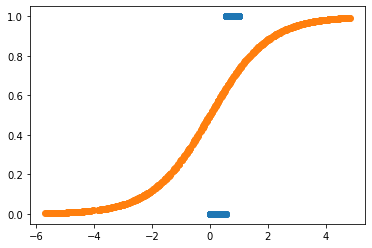

In [34]:
plt.scatter(df['weight'], df['obesity measure'])
plt.scatter(y_, sigmoid_function(y_)) ## our predicted sigmoid plot
# a = np.arange(-5,5,0.1)
# plt.plot(a, sigmoid_function(a)) ##dummy sigmoid plod to check accuracy

In [35]:
sigmoid_function(0.54545454)

0.6330803679877982

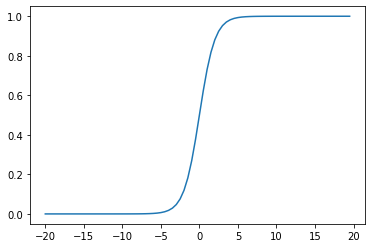

In [36]:
a = np.arange(-20,20,0.5)
plt.plot(a, sigmoid_function(a))